<div style="text-align: center">
<b><font size=6>ChEn 3603 Homework 7 Problem 3
    </font></b>
</div>

<div class="alert alert-block alert-danger">

&copy; 2020 This material is copyright protected. Distributing this material in any form without written permission from Professor Sutherland is prohibited and may result in academic discipline.

SHR problem 4.6

# Part (a)
The phase equilibrium data is given in the text book, and we plot the _T-x-y_ diagram here for reference:

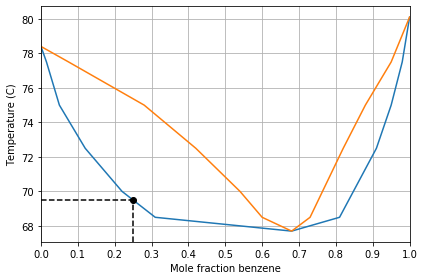

Part (a): the bubble point temperature is 69.5 C




In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

xfeed = 0.25;

# T-x-y data
T = np.array([ 78.4, 77.5, 75, 72.5, 70, 68.5, 67.7, 68.5, 72.5, 75, 77.5, 80.1 ])  # Celsius
y = np.array([ 0, 7.5, 28, 42, 54, 60, 68, 73, 82, 88, 95, 100 ])/100
x = np.array([ 0, 1.5, 5,  12, 22, 31, 68, 81, 91, 95, 98, 100 ])/100

Tbubble = np.interp( xfeed, x, T )

plt.plot(x,T,y,T)
ylim = plt.ylim()
plt.plot([xfeed,xfeed],[ylim[0],Tbubble],'k--')
plt.plot([0,xfeed],[Tbubble,Tbubble],'k--')
plt.plot(xfeed,Tbubble,'ko')
plt.xlabel('Mole fraction benzene')
plt.ylabel('Temperature (C)')
plt.grid(True)
plt.xticks( np.arange(0,1.1,0.1) )
plt.xlim([0,1])
plt.ylim(ylim)
plt.tight_layout()
plt.show()

print('Part (a): the bubble point temperature is {:.1f} C\n\n'.format(Tbubble))

Note that Benzene is the less volatile component, and we have a minimum-boiling azeotrope formed in this system. We can determine the bubble point for a mixture of $x_{A}=0.25$ by following a vertical line from $x_{A}=0.25$ to where it hits the vapor curve. Doing this, we find that 
\begin{equation}
    \boxed{T_{bubble}=69.5\,^{\circ}C}
\end{equation}

This can also be done from the data directly by interpolating $T(x_{A})$ to find 

\begin{equation}
    T(x_{A}=0.25)\approx\frac{68.5-70.0}{0.31-0.22}\left(0.25-0.22\right)+70.0=\boxed{69.5\,^{\circ}C}.
\end{equation}

# Part (b)

The first vapor bubble is found graphically by following the $T=69.5$ line from where we ended in part (a) to the left until we hit the vapor curve. 

In [2]:
# Find all indices in a that are True.
def find(a):
    return np.nonzero(a)[0]
    
ilo = find( x<xfeed )[-1]  # take the last one
ihi = ilo+1

ybubble = ( y[ihi]-y[ilo] ) / ( T[ihi] - T[ilo] ) * (Tbubble-T[ilo]) + y[ilo]

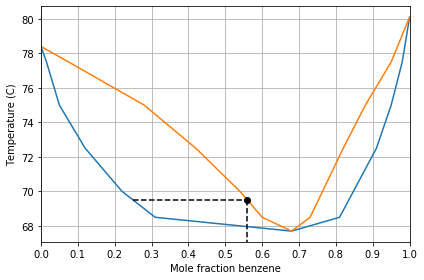

Part (b): the benzene mole fraction of the first bubble is: 0.560




In [3]:
plt.plot(x,T,y,T)

plt.plot([xfeed,ybubble],[Tbubble,Tbubble],'k--')
plt.plot([ybubble,ybubble],[Tbubble,ylim[0]],'k--')
plt.plot(ybubble,Tbubble,'ko')
plt.xlabel('Mole fraction benzene')
plt.ylabel('Temperature (C)')
plt.grid(True)
plt.xticks( np.arange(0,1.1,0.1) )
plt.xlim([0,1])
plt.ylim(ylim)
plt.tight_layout()
plt.show()

print('Part (b): the benzene mole fraction of the first bubble is: {:.3f}\n\n'.format(ybubble))


Here we find 
\begin{equation}
    \boxed{y_{A}=0.56}
\end{equation}

# Part (c)

We can use the data directly rather than doing the problem graphically. 
We first calculate the vapor fraction at a given temperature using the inverse lever arm rule: 
\begin{equation}
    \gamma(T)=\frac{0.25-x_{A}(T)}{y_{A}(T)-x_{A}(T)}.
\end{equation}
where $x_A(T)$ and $y_A(T)$ are obtained via interpolation.

We can then determine the location where this crosses the desired value of $\gamma=25\%$ and take the points $\gamma_{1}(T_{1})$ and $\gamma_{2}(T_{2})$ that bracket this location. 
We can then linearly interpolate to determine the temperature, 
\begin{align}
    T_{mix} &= \frac{T_{2}-T_{1}}{\gamma_{2}-\gamma_{1}}\left(0.25-\gamma_{1}\right)+T_{1} \\
        &= 71.2\,^{\circ}C.
\end{align}
We can now determine the corresponding liquid mole fraction via one more interpolation to find 
\begin{equation}
    \boxed{x_{A}=0.17}
\end{equation}
This is implemented in the code below.

<div class="alert alert-block alert-warning">
Note that you need not do this using code.  You can do it purely graphically as well.

In [4]:
from scipy import interpolate

def percent_vap_helper( T, x, y, gamma, xfeed ):
    #
    # Given the T-x-y data, the percent vaporized (gamma), and the feed
    # composition, this calculates the temperature and vapor/liquid
    # compositions of the equilibrium mixture.
    # 
    # INPUTS:
    #    T     - temperature data for T-x-y diagram
    #    x     - liquid equilibrium mole fractions for T-x-y diagram
    #    y     - vapor  equilibrium mole fractions for T-x-y diagram
    #    gamma - the percent vaporization (V/F)
    #    xfeed - the composition of the feed stream
    # 
    # OUTPUTS:
    #    Tnew - the temperature of the mixture
    #    xnew - the liquid composition
    #    ynew - the vapor composition
    # 
    #  Author: James C. Sutherland

    i = find( (x<=xfeed) & (y>=xfeed) )
    
    # tack on an extra point
    if i[0]>0:
        i = np.append(i[0]-1,i)
    if i[-1]<len(x)-1:
        i = np.append(i,i[-1]+1)
    
    # Calculate the vapor fraction at all points we consider here.
    # We don't use all of the points because that causes numerical problems
    vapFrac = ( xfeed-x[i] ) / ( y[i]-x[i] )
    
    # Interpolate to find the temperature at which the desired vapor fraction occurs:
    Tnew = interpolate.interp1d( vapFrac, T[i], bounds_error=False )(gamma)
    
    i2 = find(T<=Tnew)[0]  # pick the first one
    i1 = i2-1;
    xnew = (x[i2]-x[i1])/(T[i2]-T[i1]) * (Tnew-T[i1]) + x[i1]
    ynew = (y[i2]-y[i1])/(T[i2]-T[i1]) * (Tnew-T[i1]) + y[i1]

    return [Tnew,xnew,ynew]

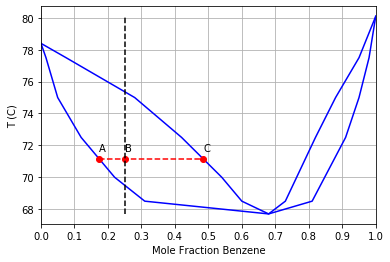

At 25% vaporization:
   xA = 0.174
   yA = 0.485
   T  = 71.2



In [5]:
target = 0.25  # percent vaporized

Tc,xc,yc = percent_vap_helper( T, x, y, target, xfeed )

plt.plot(x,T,'b-',y,T,'b-')
plt.plot([xc,xfeed,yc],[Tc,Tc,Tc],'r--o')
plt.plot([xfeed,xfeed],[min(T),max(T)],'k--')
plt.text(xc,Tc+.5,'A')
plt.text(yc,Tc+.5,'C')
plt.text(xfeed,Tc+.5,'B')
plt.grid(True)
plt.xlabel('Mole Fraction Benzene')
plt.ylabel('T (C)')
plt.xticks(np.arange(0,1.1,0.1))
plt.xlim([0,1])
plt.show()

print('At {:.0f}% vaporization:'.format(target*100))
print('   xA = {:.3f}'.format(xc))
print('   yA = {:.3f}'.format(yc))
print('   T  = {:.1f}\n'.format(Tc[()]))

## Alternative approach
We need to find a horizontal tie-line such that the vapor fraction, $\gamma$, is 
\begin{equation}
    \gamma=\frac{AB}{AC}=0.25, \label{eq:percent-vapor}
\end{equation}
where A represents the saturated liquid composition, C is the saturated vapor composition, and B=0.25 is the benzene mole fraction of the total mixture. We can narrow down the range of consideration by realizing that $y_{A}\ge0.25$ and $x_{A}\le0.25$. 

Graphically, we can iterate by choosing a temperature (horizontal line) in this range and measuring $\frac{AB}{AC}$ and repeating until we find the correct temperature at which $\gamma=0.25$ (see equation \ref{eq:percent-vapor}). 
Note that location “B” is fixed by the intersection of the vertical line at $x_{A}=0.25$ (corresponding to the feed composition) and the horizontal line at the guessed temperature. 

# Part d

Repeating part (c) for $\gamma=0.9$ we find

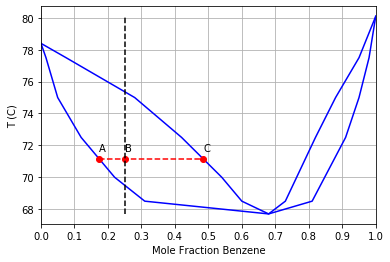

At 90% vaporization:
   xA = 0.174
   yA = 0.485
   T  = 71.2



In [6]:
target = 0.9  # percent vaporized

Td,xd,yd = percent_vap_helper( T, x, y, target, xfeed )

plt.plot(x,T,'b-',y,T,'b-')
plt.plot([xc,xfeed,yc],[Tc,Tc,Tc],'r--o')
plt.plot([xfeed,xfeed],[min(T),max(T)],'k--')
plt.text(xc,Tc+.5,'A')
plt.text(yc,Tc+.5,'C')
plt.text(xfeed,Tc+.5,'B')
plt.grid(True)
plt.xlabel('Mole Fraction Benzene')
plt.ylabel('T (C)')
plt.xticks(np.arange(0,1.1,0.1))
plt.xlim([0,1])
plt.show()

print('At {:.0f}% vaporization:'.format(target*100))
print('   xA = {:.3f}'.format(xc))
print('   yA = {:.3f}'.format(yc))
print('   T  = {:.1f}\n'.format(Tc[()]))

# Part e 

Here we remove the vapor from part (c), and then vaporize an additional 35% of the remaining liquid. This essentially is a repeat of part (c) or (d) but with the “feed” mole fraction of benzene being 0.17 (the liquid composition from part c) rather than 0.25 and $\gamma=0.35$. Doing this, we obtain 
\begin{equation}
    \boxed{x_{A}=0.087}
\end{equation}
at a temperature of $73.7^{\circ}$ C. This is shown graphically below.

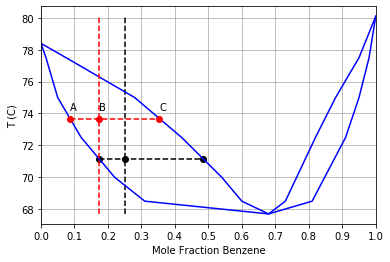

At 35% vaporization:
   xA = 0.087
   yA = 0.354
   T  = 73.7



In [7]:
target = 0.35
Te,xe,ye = percent_vap_helper( T, x, y, target, xc )

plt.plot([xc,xfeed,yc],[Tc,Tc,Tc],'k--o',[xfeed,xfeed],[min(T),max(T)],'k--')
plt.plot(x,T,'b-',y,T,'b-',[xe,xc,ye],[Te,Te,Te],'r--o',[xc,xc],[min(T),max(T)],'r--');
plt.text(xe,Te+.5,'A')
plt.text(ye,Te+.5,'C')
plt.text(xc,Te+.5,'B');
plt.grid(True)
plt.xlabel('Mole Fraction Benzene')
plt.ylabel('T (C)')
plt.xticks(np.arange(0,1.1,0.1))
plt.xlim([0,1])
plt.show()

print('At {:.0f}% vaporization:'.format(target*100))
print('   xA = {:.3f}'.format(xe))
print('   yA = {:.3f}'.format(ye))
print('   T  = {:.1f}\n'.format(Te[()]))